In [49]:
#importing packages
import inline as inline
import matplotlib as matplotlib
#%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [50]:
df = pd.read_csv('creditcard.csv')

In [51]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [52]:
print(df.sample (6))

            Time        V1        V2        V3        V4        V5        V6  \
26196    33948.0 -1.314140  0.322885  2.526366  0.205844  0.058926  0.162689   
232499  147195.0 -0.210373  1.707828  0.289360  4.962992  0.728145  2.275366   
49815    44224.0 -1.238342  0.811786 -0.497377  0.872691  2.578560 -2.603723   
1741      1350.0 -1.219970  1.484974  1.247162 -0.792609 -0.127246 -0.913876   
220346  142130.0 -2.479080  1.474393  0.800718 -1.568215  0.548161 -0.443480   
243054  151769.0  2.025245 -1.335912 -1.198109 -1.116981 -1.203083 -1.176983   

              V7        V8        V9  ...       V21       V22       V23  \
26196   0.128277  0.305185 -0.104935  ...  0.058374  0.152503 -0.100706   
232499 -0.779174 -2.528164 -1.176290  ... -2.002516 -1.251858 -0.149100   
49815   0.798482 -0.252029 -0.921667  ...  0.012223 -0.251404 -0.108145   
1741    0.806929 -0.067242  0.451154  ... -0.274254 -0.379031 -0.055874   
220346  0.904141  0.102933  1.401458  ... -0.830661 -1.409727  0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [54]:
#numerical summary -> only non-anonymized columns of interest
#pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

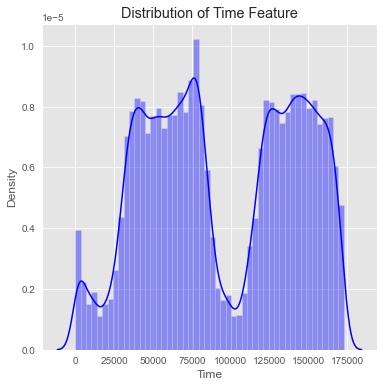

In [55]:
#visualizations of time and amount
plt.figure(figsize=(6,6))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time , color= 'b')

<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

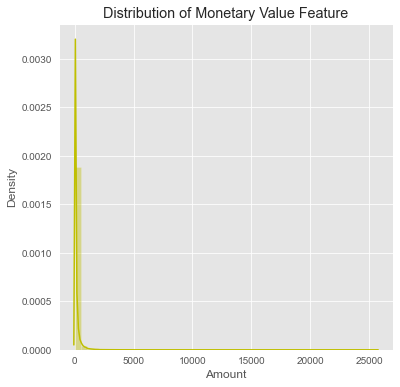

In [56]:
plt.figure(figsize=(6,6))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount , color='y')

In [57]:
#fraud vs. normal transactions
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

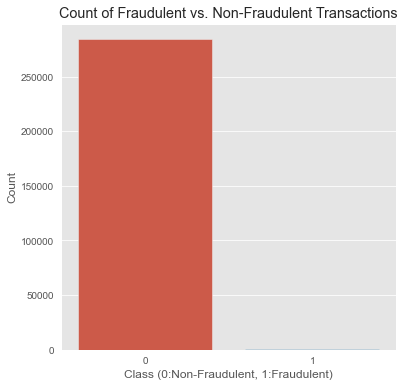

In [58]:
plt.figure(figsize=(6,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [59]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Text(0.5, 1.0, 'Heatmap of Correlation')

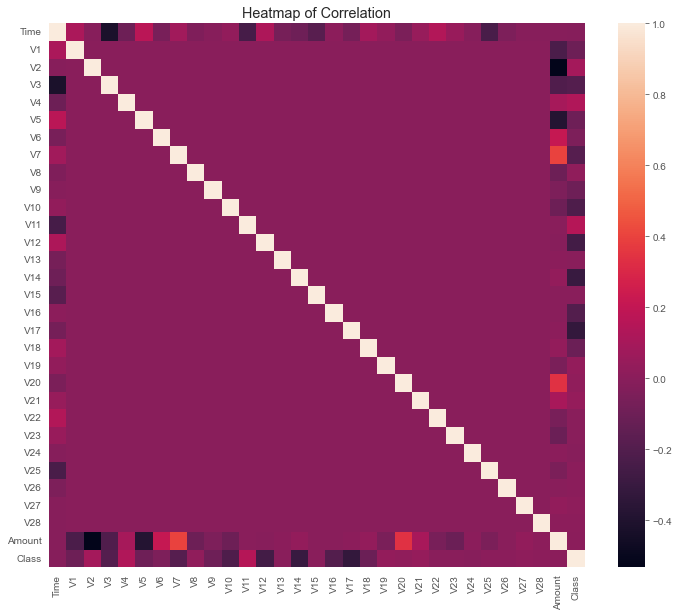

In [60]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [61]:
#skewness
skew_ = df.skew()
skew_

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [63]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [64]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
230358,146302.0,1.994212,0.178913,-1.533691,1.292854,0.415612,-0.885289,0.506487,-0.253692,-0.003317,...,0.007563,0.012344,0.406204,-0.510036,-0.019495,-0.073511,1.00,0,-0.349231,1.084233
64982,51386.0,-0.878936,-1.105542,1.148136,-1.220224,-0.880409,1.586768,1.381670,0.002646,1.791954,...,0.395452,-1.307147,0.577272,-0.441379,-0.123972,-0.141117,395.00,0,1.226015,-0.914501
104242,68976.0,1.164076,-0.058952,1.135773,0.942149,-1.013944,-0.574004,-0.387440,-0.075922,0.648267,...,-0.081563,0.820406,0.479127,0.485404,0.010173,0.025739,15.52,0,-0.291179,-0.544092
29313,35415.0,1.096275,-0.140654,1.457531,0.934940,-1.095250,-0.124415,-0.629332,0.127189,0.762121,...,0.113888,0.665625,0.137959,0.310584,0.039213,0.031464,11.50,0,-0.307251,-1.250817
48466,43657.0,0.664435,-1.733572,-1.708961,-1.015887,1.300251,3.297151,-0.202404,0.625900,-1.314966,...,-0.040284,0.939150,-0.026470,-0.049024,-0.099047,0.084492,405.10,0,1.266395,-1.077257


In [65]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [66]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256581, 31)
Test Shape: (28226, 31)


In [67]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [68]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 437 fraudulent transactions in the train data.


In [69]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [70]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
238012,-0.082845,0.983903,0.883923,0.987807,0.479347,-0.643126,0.851173,-0.497938,-0.497289,0.567948,...,-0.294740,-0.090350,0.113166,-0.653535,0.592365,0.122974,-0.004569,0,-0.346113,1.399344
120913,1.159333,0.176960,0.298640,1.193028,0.084470,0.331810,-0.046998,0.151074,0.044219,0.046074,...,0.005086,-0.109312,-0.285938,0.681984,-0.309341,0.037473,0.001392,0,-0.349231,-0.297377
219594,-2.717290,1.077626,-2.084235,-0.628211,-0.190024,-1.561881,0.310328,1.067565,0.661381,-2.243183,...,0.454111,0.056516,-0.243907,0.359670,-0.593489,0.530728,-0.148146,0,-0.153325,1.204727
197732,1.559433,-1.081582,-0.350059,1.863638,-1.011854,0.008372,-0.476366,0.080013,1.796242,-0.055722,...,0.994748,-0.209497,0.000383,0.187259,-0.303140,0.030212,-0.010295,0,0.430396,0.987535
27916,1.365819,-1.207325,0.886255,-1.419808,-1.700462,-0.123164,-1.393221,0.114857,-1.904472,1.538162,...,0.513248,0.024436,0.222314,0.210542,-0.105959,0.063006,0.019053,0,-0.237285,-1.235402


In [71]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [72]:
subsample = pd.concat([selected, fraud])
len(subsample)

874

In [73]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1,1.102834,-1.122574
1,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,11.161144,-4.099551,-9.222826,...,-1.151606,-0.680052,0.108176,1.066878,-0.233720,1.707521,0.511423,1,0.046539,-1.465271
2,0.666674,-0.383658,-0.288232,1.479784,-0.172068,-0.780203,0.877562,-0.324587,-0.449901,-0.082413,...,0.112799,-0.323534,0.430247,0.637394,-0.301425,-0.043124,0.060223,0,0.770833,-1.091408
3,1.350821,-0.488790,-0.152951,-0.667127,-0.779933,-1.011976,-0.183167,-0.195880,-1.257735,0.911771,...,-0.515070,-0.044780,0.362767,0.391418,1.101315,-0.097654,-0.012949,0,-0.249679,-1.050261
4,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,-14.924655,...,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,1,0.400490,-0.020086
5,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,-7.781353,...,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,1,2.237530,-1.091345
6,-0.738664,-1.325445,2.662674,-2.822248,-1.427438,-0.254113,-1.136939,-0.062598,-0.344698,0.639092,...,1.042652,-0.170794,0.430669,-0.690395,-0.356867,-0.140675,0.003377,0,-0.247120,1.400229
7,1.214613,0.317695,0.463319,1.118006,-0.368664,-0.881592,0.133159,-0.198850,0.028318,-0.012703,...,-0.120358,-0.030583,0.379109,0.545094,-0.440292,0.021668,0.027705,0,-0.297296,-0.537016
8,-0.852343,0.794752,1.280653,0.595867,-0.061721,0.424459,-0.126453,0.736509,-0.601312,-0.495973,...,-0.146433,-0.131516,-0.275219,-0.151348,0.426022,-0.026378,0.001271,0,-0.327202,-0.677641
9,-0.244125,1.332023,-0.334229,-0.509462,0.730313,-1.103245,1.020293,-0.221642,0.036413,-0.442178,...,-0.696079,0.151433,1.065545,-0.411146,0.072170,0.198611,0.156206,0,-0.335278,1.575536


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

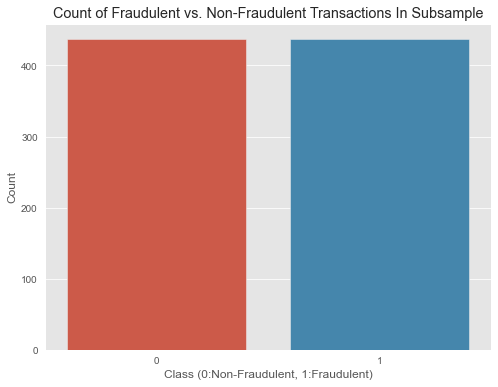

In [74]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [75]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.431669
V2,0.507635
V3,-0.571175
V4,0.700508
V5,-0.369593
V6,-0.391632
V7,-0.483414
V8,0.068023
V9,-0.570357
V10,-0.630167


In [76]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.571175
V9,-0.570357
V10,-0.630167
V12,-0.677356
V14,-0.753598
V16,-0.587044
V17,-0.554142


In [77]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V2,0.507635
V4,0.700508
V11,0.687098
Class,1.000000


In [ ]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

In [ ]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [ ]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [ ]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

In [ ]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [ ]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

In [ ]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [ ]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle= True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
#ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')